## Task: Determine the eligibility for granting Home loan.

Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.




## Load data and libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data: https://drive.google.com/file/d/1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w/view?usp=sharing
# Download data
id = "1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w"
path = "https://docs.google.com/uc?export=download&id=" + id
print(path)

https://docs.google.com/uc?export=download&id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w


In [3]:
!wget "https://docs.google.com/uc?export=download&id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w" -O train.csv

--2022-07-25 13:37:17--  https://docs.google.com/uc?export=download&id=1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w
Resolving docs.google.com (docs.google.com)... 172.253.62.138, 172.253.62.102, 172.253.62.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d2lf91u0ibh30dli0nahcifh0ihd39pi/1658756175000/04821913037600172422/*/1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w?e=download&uuid=da114f2a-2a6b-4c00-b532-6fd86b081465 [following]
--2022-07-25 13:37:17--  https://doc-0o-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d2lf91u0ibh30dli0nahcifh0ihd39pi/1658756175000/04821913037600172422/*/1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w?e=download&uuid=da114f2a-2a6b-4c00-b532-6fd86b081465
Resolving doc-0o-90-docs.googleusercontent.com (doc-0o-90-docs.googleusercontent.com)... 172.217.15.65, 2607:f8b0:4

In [4]:
!ls -lrt

total 44
drwxr-xr-x 1 root root  4096 Jul 13 13:43 sample_data
-rw-r--r-- 1 root root 38011 Jul 25 13:37 train.csv


In [5]:
!cat train.csv

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N
LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y
LP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y
LP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y
LP001029,Male,No,0,Graduate,No,1853,2840,114,360,1,Rural,N

In [6]:
data = pd.read_csv('./train.csv')
data.shape

(614, 13)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.dtypes
#object => typically categorical/IDs
#Int64, Float64

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
# drop loanID column
data = data.drop('Loan_ID',axis = 1)

## Basic Data Exploration

In [ ]:
data.describe()
# only numeric features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# catgeorical features
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
#missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
cat_cols.remove('Loan_Status')

In [ ]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [ ]:
data[num_cols].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


## Basic Data visualization: Univariate

In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

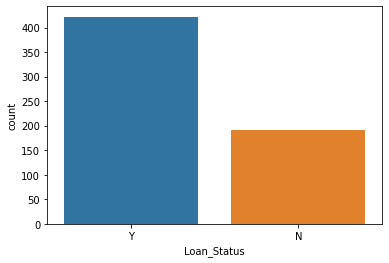

In [ ]:
#Q: How many loans the company has approved in the past? 
sns.countplot(data=data, x='Loan_Status')
plt.show()

In [ ]:
target = 'Loan_Status'
data[target].value_counts()

# Imbalanced data

Y    422
N    192
Name: Loan_Status, dtype: int64

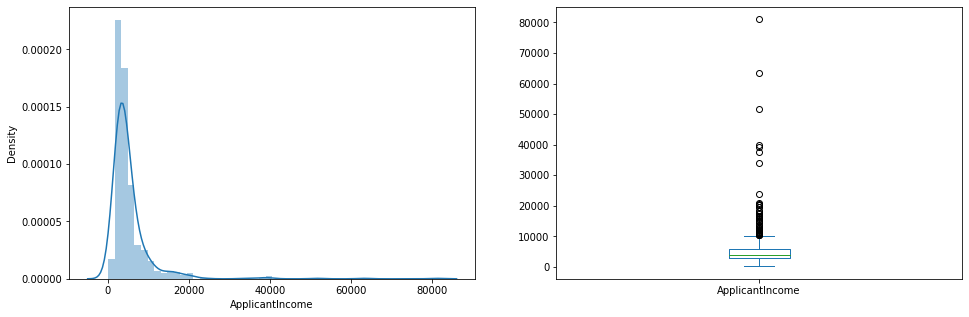

In [ ]:
#Income of the applicant
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

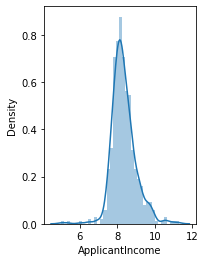

In [ ]:
plt.subplot(121)
sns.distplot(np.log(data["ApplicantIncome"]))

plt.show()

In [ ]:
#Slice this data by Education

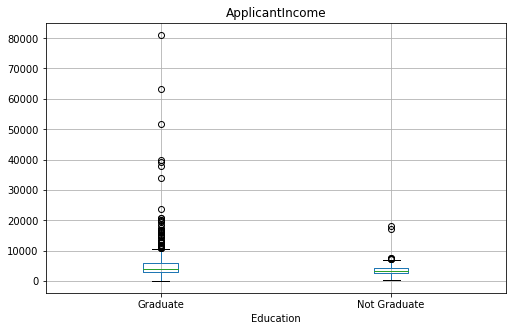

In [ ]:
data.boxplot(column='ApplicantIncome', by="Education", figsize=(8,5))
plt.suptitle("")
plt.show()

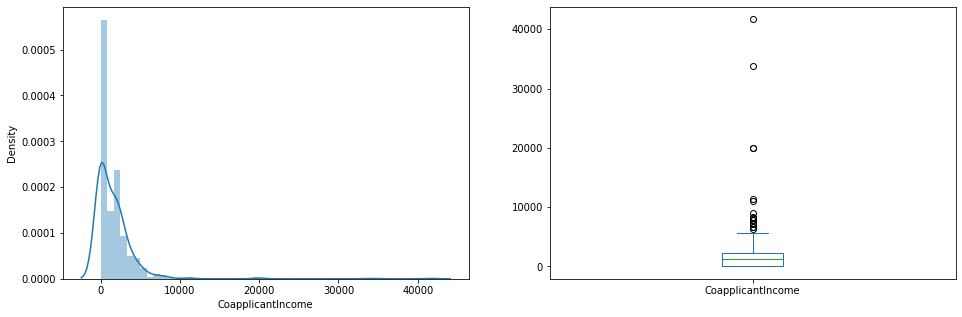

In [ ]:
#co-applicant income
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [ ]:
#Relation between "Loan_Status" and "Income"

In [ ]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

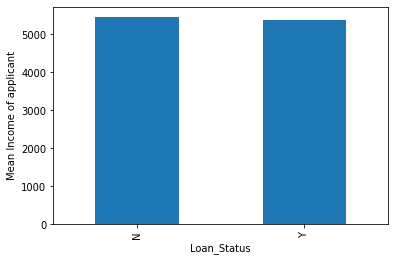

In [ ]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

## Simple Feature Engineering

In [ ]:
# Feature binning: income
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


### Incomes

In [ ]:
#observed 
pd.crosstab(data["Income_bin"],data["Loan_Status"])


Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


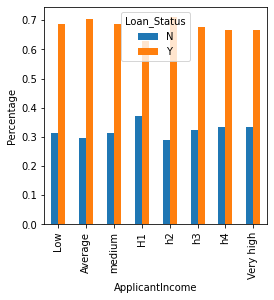

In [ ]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

#It can be inferred that Applicant income does not affect the chances of loan approval. Which seems wrong as per our understanding.


In [ ]:
#co-appplicant income
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin']=pd.cut(data["CoapplicantIncome"],bins,labels=group)

In [ ]:
pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])


Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,19
Average,61,161
High,32,65


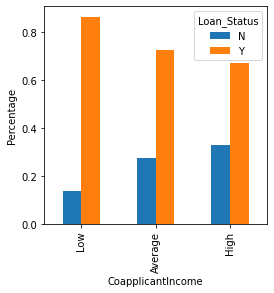

In [ ]:
CoapplicantIncome_Bin = pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(axis = 1),axis=0).plot(kind='bar',figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

## What's the problem here? Why co-applicant having low income is getting maximum loan approved?


In [ ]:
data['CoapplicantIncome'].value_counts().head()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
Name: CoapplicantIncome, dtype: int64

In [ ]:
# New feature:  total household income
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [ ]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [ ]:
pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])


Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


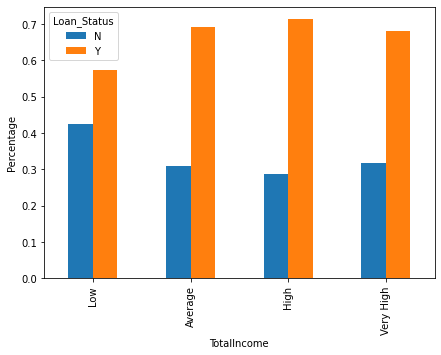

In [ ]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

# Observation: We can see that Proportion of loans getting approved for 
# applicants having low Total_Income is very less as compared to that of applicants 
# with Average, High and Very High Income.

In [ ]:
data = data.drop(["Income_bin","CoapplicantIncome_bin","TotalIncome_bin"],axis=1)

### Loan Amount and Loan Term

In [ ]:
data['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')


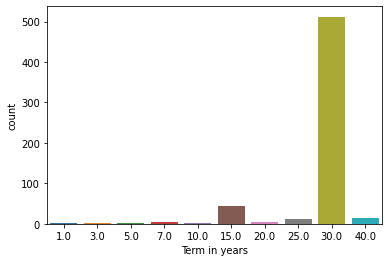

In [ ]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()
# Observation: We can clearly see that more than 90% of the loans were applied for 30 years.



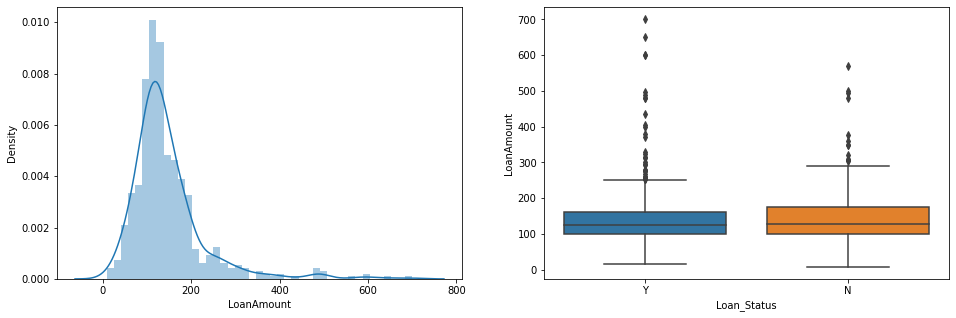

In [ ]:
### Distribution of "LoanAmount" variable :

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [ ]:
# Approximate calc: ignoring interest rates as we dont know that.
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']


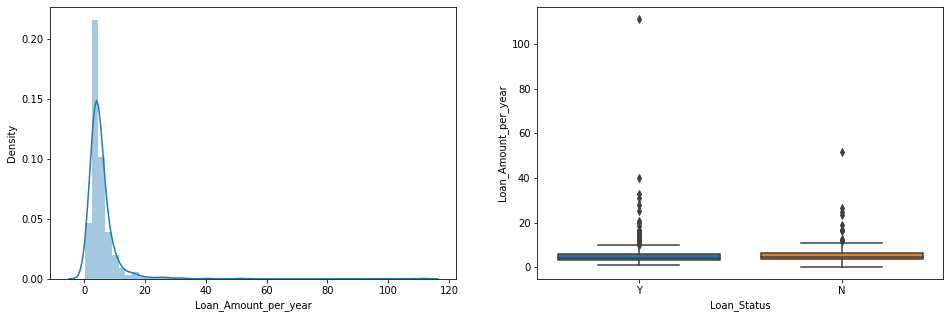

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['Loan_Amount_per_year']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'Loan_Amount_per_year')

plt.show()

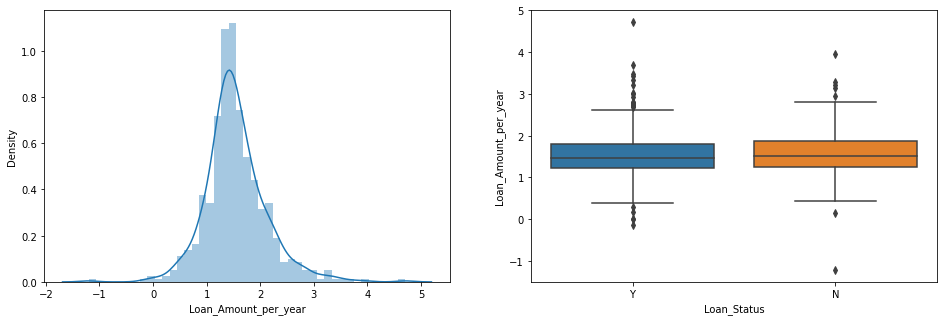

In [ ]:
# log transform
plt.figure(figsize=(16,5))
plt.subplot(121)
log_loanAmount = np.log(data['Loan_Amount_per_year'])
sns.distplot(log_loanAmount)

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = log_loanAmount)

plt.show()

In [ ]:
# Feature : Calculate the EMI based on the Loan Amount Per year.
data['EMI'] = data['Loan_Amount_per_year']*1000/12

In [ ]:
#Feature : Able_to_pay_EMI
data['Able_to_pay_EMI'] = (data['TotalIncome']*0.1 > data['EMI']).astype('int')


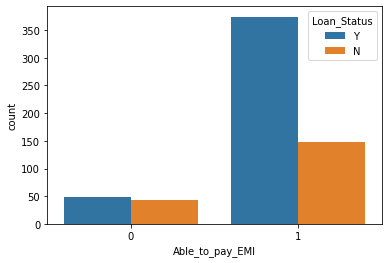

In [ ]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')
#Observation:
###There is 50% chance that you may get the loan approved if you cannot pay the EMI.
###But there, is a 72% chance that you may get the loan approved if you can pay the EMI.

### Dependents and Loan **approval**

In [ ]:
data['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data['Dependents'].replace('3+',3,inplace=True)


In [ ]:
data['Dependents'] = data['Dependents'].astype('float')


In [ ]:
data.dtypes

Gender                   object
Married                  object
Dependents              float64
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
TotalIncome             float64
Loan_Amount_per_year    float64
EMI                     float64
Able_to_pay_EMI           int64
dtype: object

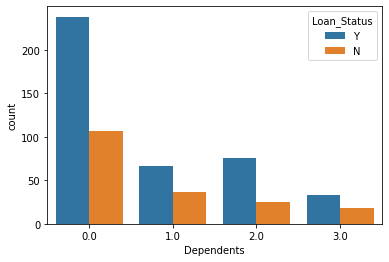

In [ ]:
sns.countplot(data =data, x = 'Dependents', hue = 'Loan_Status')

#Observations:

## No Dependents and 2 dependents will helps you get loan easily.

### Credit History vs Loan Approval

In [ ]:
data['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

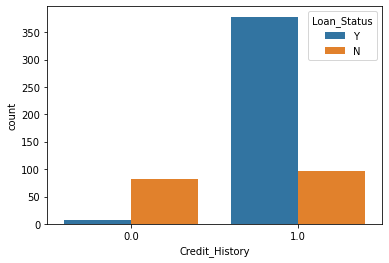

In [ ]:
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')
#Observation:
## We can clearly see that the approval rate is 80% if your credit history is aligned with the guidlines.
## Hence this is the most important question that can be considered.

## Missing Values & Data Cleaning

In [ ]:
data.isna().sum()


Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
TotalIncome              0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

In [ ]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Credit_History,50,8.143322
Loan_Amount_per_year,36,5.863192
EMI,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


In [ ]:
# Credit History=2 for nan/missing values.
data['Credit_History'] = data['Credit_History'].fillna(2)


In [ ]:
# Self_Employed = 'Other' for nan
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')


In [ ]:
# median imputation for numerical columns.
from sklearn.impute import SimpleImputer

num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
# Highest Freq imputation for some categorical columns.
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent


## Categorical to Numerical encoding

Nominal vs Ordinal variables

1. One Hot Encoding
2. Label encoding
3. Target Encoding

Appropriate encoding depends on what our task is (and) what we do next?

#### Task: Compute Correlation (PCC and SRCC) between each feature and the Loan-Status


In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Loan Status

In [ ]:
# Loan_Status
col='Loan_Status'
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col='Loan_Status'
data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data[col].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Gender

In [ ]:
#Gender
data['Gender'].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col='Gender'
data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data[col].value_counts()

1    502
0    112
Name: Gender, dtype: int64

### Married

In [ ]:
# Married
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
col='Married'
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

1    401
0    213
Name: Married, dtype: int64

### Property Area

In [ ]:
# col='Property_Area'
col='Property_Area'
data[col].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder

te = TargetEncoder()
data[col] = te.fit_transform(data[col], data['Loan_Status'])


In [ ]:
col='Property_Area'
data[col].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

### Education

In [ ]:
col='Education'
data[col].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

0    480
1    134
Name: Education, dtype: int64

### Self Employed

In [ ]:
col='Self_Employed'
data[col].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [ ]:
from category_encoders import TargetEncoder

te = TargetEncoder()
data[col] = te.fit_transform(data[col], data['Loan_Status'])
data[col].value_counts()

0.686000    500
0.682927     82
0.718750     32
Name: Self_Employed, dtype: int64

In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols
# No more non numeric cols.

[]

In [ ]:
data.dtypes

Gender                    int64
Married                   int64
Dependents              float64
Education                 int64
Self_Employed           float64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area           float64
Loan_Status               int64
TotalIncome             float64
Loan_Amount_per_year    float64
EMI                     float64
Able_to_pay_EMI           int64
dtype: object

### Correlation Coefficients


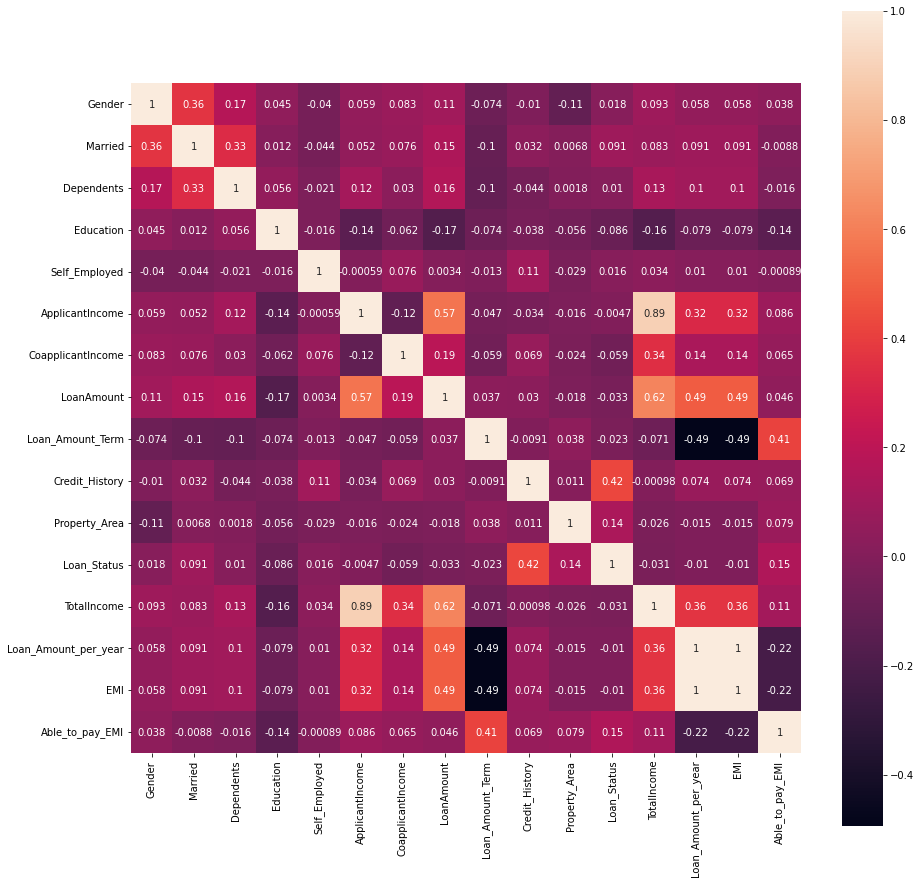

In [ ]:
#PCC
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True)

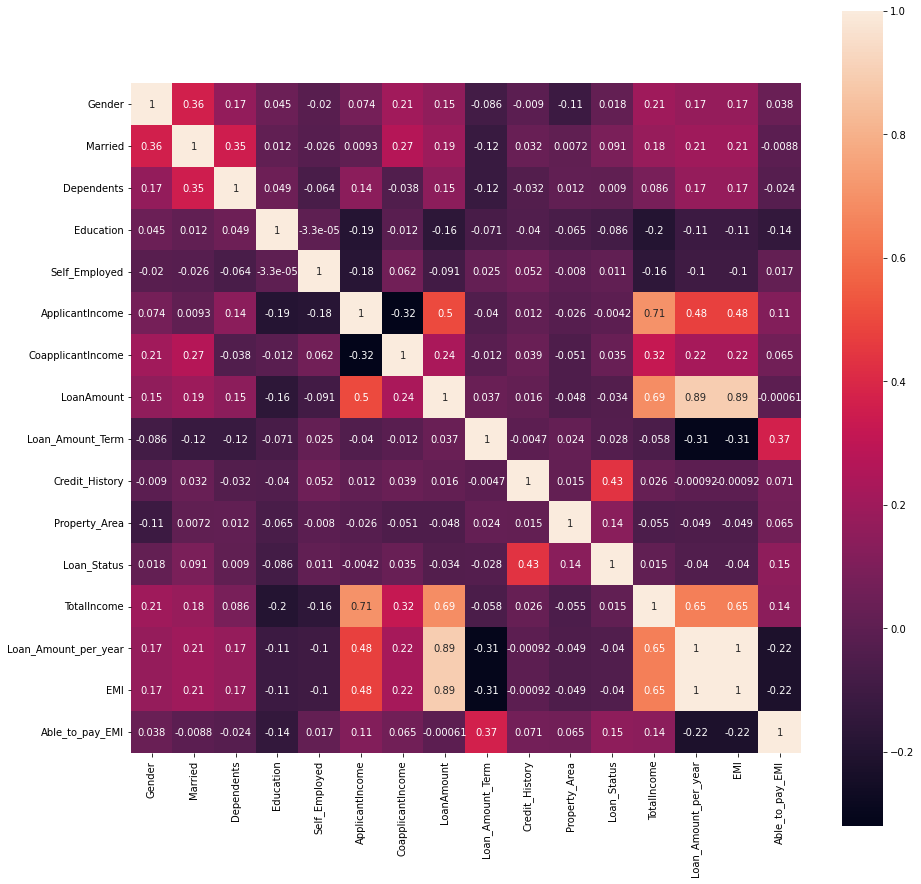

In [ ]:
#SRCC
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(method='spearman'), square=True,annot=True)

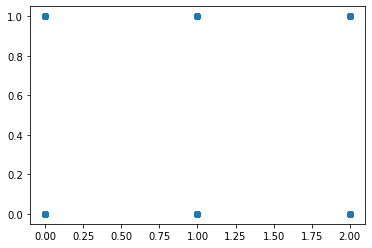

In [ ]:
plt.scatter(data['Credit_History'], data['Loan_Status'])
plt.show()
#sometimes scatter plots can be misleading do to catgeorical nature of the data

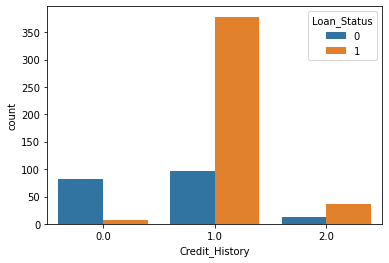

In [ ]:
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')


## Column Standarization and Normalization
- Mean centering and Variance scaling (Stndard Scaling)
- MinMax Scaling



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(data)
std_data = pd.DataFrame(std_data, columns=data.columns)
std_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,0.472343,-1.372089,-0.737806,-0.528362,-0.174052,0.072991,-0.554487,-0.211241,0.273231,0.134703,-0.440191,0.674519,-0.182184,-0.212270,-0.212270,-2.381998
1,0.472343,0.728816,0.253470,-0.528362,-0.174052,-0.134412,-0.038732,-0.211241,0.273231,0.134703,-1.109162,-1.482537,-0.144684,-0.231329,-0.231329,0.419816
2,0.472343,0.728816,-0.737806,-0.528362,-0.586643,-0.393747,-0.554487,-0.948996,0.273231,0.134703,-0.440191,0.674519,-0.623656,-0.568956,-0.568956,0.419816
3,0.472343,0.728816,-0.737806,1.892641,-0.174052,-0.462062,0.251980,-0.306435,0.273231,0.134703,-0.440191,0.674519,-0.322885,-0.274894,-0.274894,0.419816
4,0.472343,-1.372089,-0.737806,-0.528362,-0.174052,0.097728,-0.554487,-0.056551,0.273231,0.134703,-0.440191,0.674519,-0.158785,-0.160537,-0.160537,0.419816
